## Python API Interview

API documentation: https://code.stratodem.com

Database documentation provided by StratoDem

In [20]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn as sns

# StratoDem Analytics API query imports
from strato_query import SDAPIQuery, APIQueryParams
from strato_query.authentication import authenticate_to_api
from strato_query.filters import GreaterThanOrEqualToFilter
from strato_query.aggregations import SumAggregation

In [28]:
# Authenticate to the API
authenticate_to_api('my-api-token-here')

   YEAR  GEOID5  HOUSEHOLDS_AGE_75PLUS_HHI_50K_PLUS
0  2000   25001                         3033.874958
1  2000   25003                         1452.231547
2  2000   25005                         2826.313582
3  2000   25007                           91.482765
4  2000   25009                         5986.829078


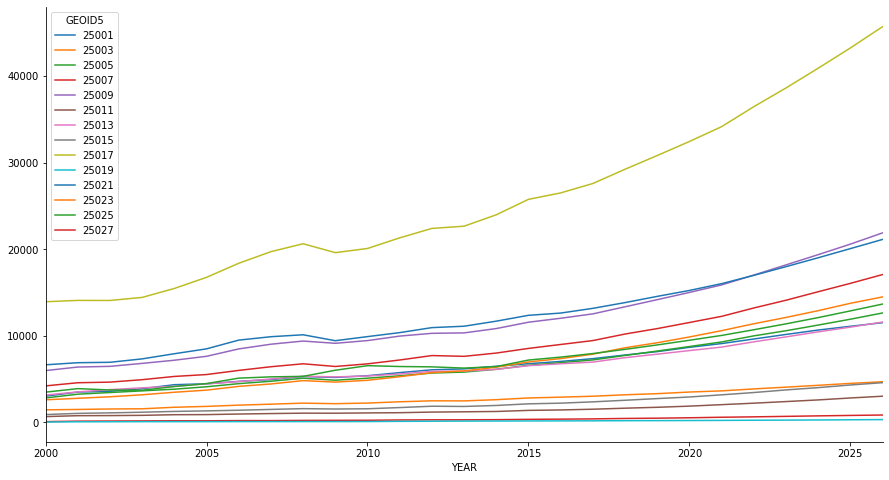

In [25]:
df = SDAPIQuery.query_api_df(
    APIQueryParams(
        # Passing in a dictionary to data_fields allows for renaming variables in the resulting DataFrame or JSON
        data_fields=['year', 'geoid5', {'households': 'households_age_75plus_hhi_50k_plus'}],
        table='incomeforecast_county_annual_income_group_age',
        data_filters=(
            EqualToFilter('geoid2', 25),
            # Cutoff for age 75+
            GreaterThanOrEqualToFilter('age_g', 16),
            # Cutoff for $50,000+ HHI
            GreaterThanOrEqualToFilter('income_g', 10),
        ),
        groupby=('year', 'geoid5'),
        aggregations=[SumAggregation('households')],
        order=('year', 'geoid5')
    ))

print(df.head())

df.pivot('YEAR', 'GEOID5', 'HOUSEHOLDS_AGE_75PLUS_HHI_50K_PLUS').plot(figsize=(15, 8))
sns.despine()
plt.show();

## Construct a query that returns the median household income for households age 75+ for all census tracts in Massachusetts

In [26]:
# Code goes here

## Identify the top five growth census tracts in Suffolk County (GEOID5 = 25025) from 2014 to 2019 for median household income for households age 75+

In [27]:
# Code goes here